## Kaggle Competition

**Description:**
This is a regression problem with 20 numerical predictors and 1 target. You have access to 400 training samples, and there are 800 testing samples. You will train your model on the training samples and then make predictions on the 800 testing samples, which you will submit (as a .csv file) to be scored. There is an example testing submission file included to demonstrate how the submission files should look.

**Evaluation:**
Your performance will be judged using mean-squared error (MSE), given by

\begin{equation}
\text{RMSE} = \sqrt{\sum_{i=1}^{N}(f(x_i) - y^2})
\end{equation}

where f is your model and n=800 is the total number of test samples. You submit these predictions to kaggle using the submission instructions. The leaderboard will show your performance on half of the testing samples (400 samples), while another 400 remain for "private" testing, and your score on this private set will be revealed at the end of the competition.

**Submission:**
For each 'id' in the test set, you must predict a value for the 'target' variable. Your predictions must be contained in a .csv file with the first column containing the 'id' and the second column containing the 'target' variable.

In [6]:
##---- DATA DOWNLOAD -------------------
!kaggle competitions download -c https://www.kaggle.com/competitions/umt-csci-447-fall-2023-competition

403 - Forbidden - Permission 'competitions.participate' was denied


In [32]:
##---- READING DATA --------------------
import pandas as pd

example = pd.read_csv('example_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("TEST DATA:")
test.head()

TEST DATA:


id        f1        f2        f3        f4        f5        f6        f7  \
0  401  0.963814 -0.360401 -0.041354 -1.565599  1.737945  1.659717  1.480158   
1  402  1.118852  0.807891  0.311665 -1.129158  1.737983  1.656538 -0.933568   
2  403  1.063174  0.283987  0.329134  0.857807  1.737917  1.648599  0.475067   
3  404  1.176543  0.321864  0.325012 -0.708241  1.737978  1.642645  0.034345   
4  405  0.741057 -0.143084  0.503625  1.111256  1.737958  1.674302  1.511315   

         f8        f9  ...       f11       f12       f13       f14       f15  \
0 -1.717814  0.536475  ...  3.021644  0.784399  1.435519  0.582982  0.683580   
1  1.409432  0.691151  ... -2.564095  1.259623  0.057445  0.564418  0.966116   
2  0.896373  1.681297  ...  2.842105  3.744957  0.387059  0.491567  0.791949   
3  0.876352  1.005261  ...  2.124828  2.267765 -0.510772  0.640024  0.751590   
4  2.195464  1.838759  ...  0.955074  2.295911 -1.613589  0.895568  0.764478   

        f16       f17       f18       f19       f20  
0  0.294960  1.892775  0.262734  0.826233  0.506849  
1  0.598086  2.361560  0.923635  2.364288  0.745997  
2  0.693784  1.637491 -2.519111  1.012792  0.578348  
3  1.652641  2.170502  1.488497  1.525883  0.102574  
4  1.527531  2.589030  1.249002  1.257046  0.484814  

[5 rows x 21 columns]

In [33]:
example.head()

id    target
0  401 -0.214425
1  402 -1.257892
2  403  0.891379
3  404 -0.764414
4  405 -0.018666

In [10]:
##---- DATA CLEANING, VISUALIZATION, EXPLORATION ------------------

# What are the dimensions of the data
print(train.shape)

(400, 22)


Text(0.5, 0, 'f1')

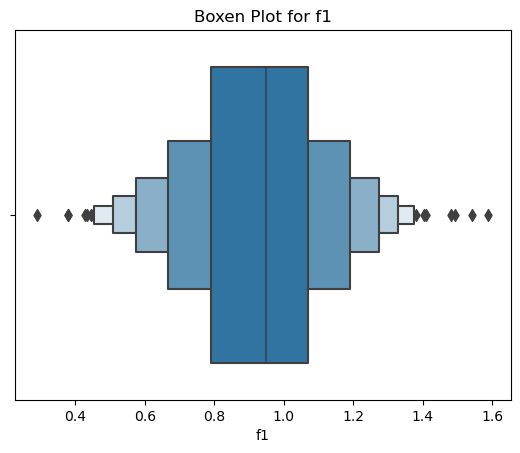

In [27]:
sns.boxenplot(x = train['f1'])

plt.title('Boxen Plot for f1')
plt.xlabel('f1')

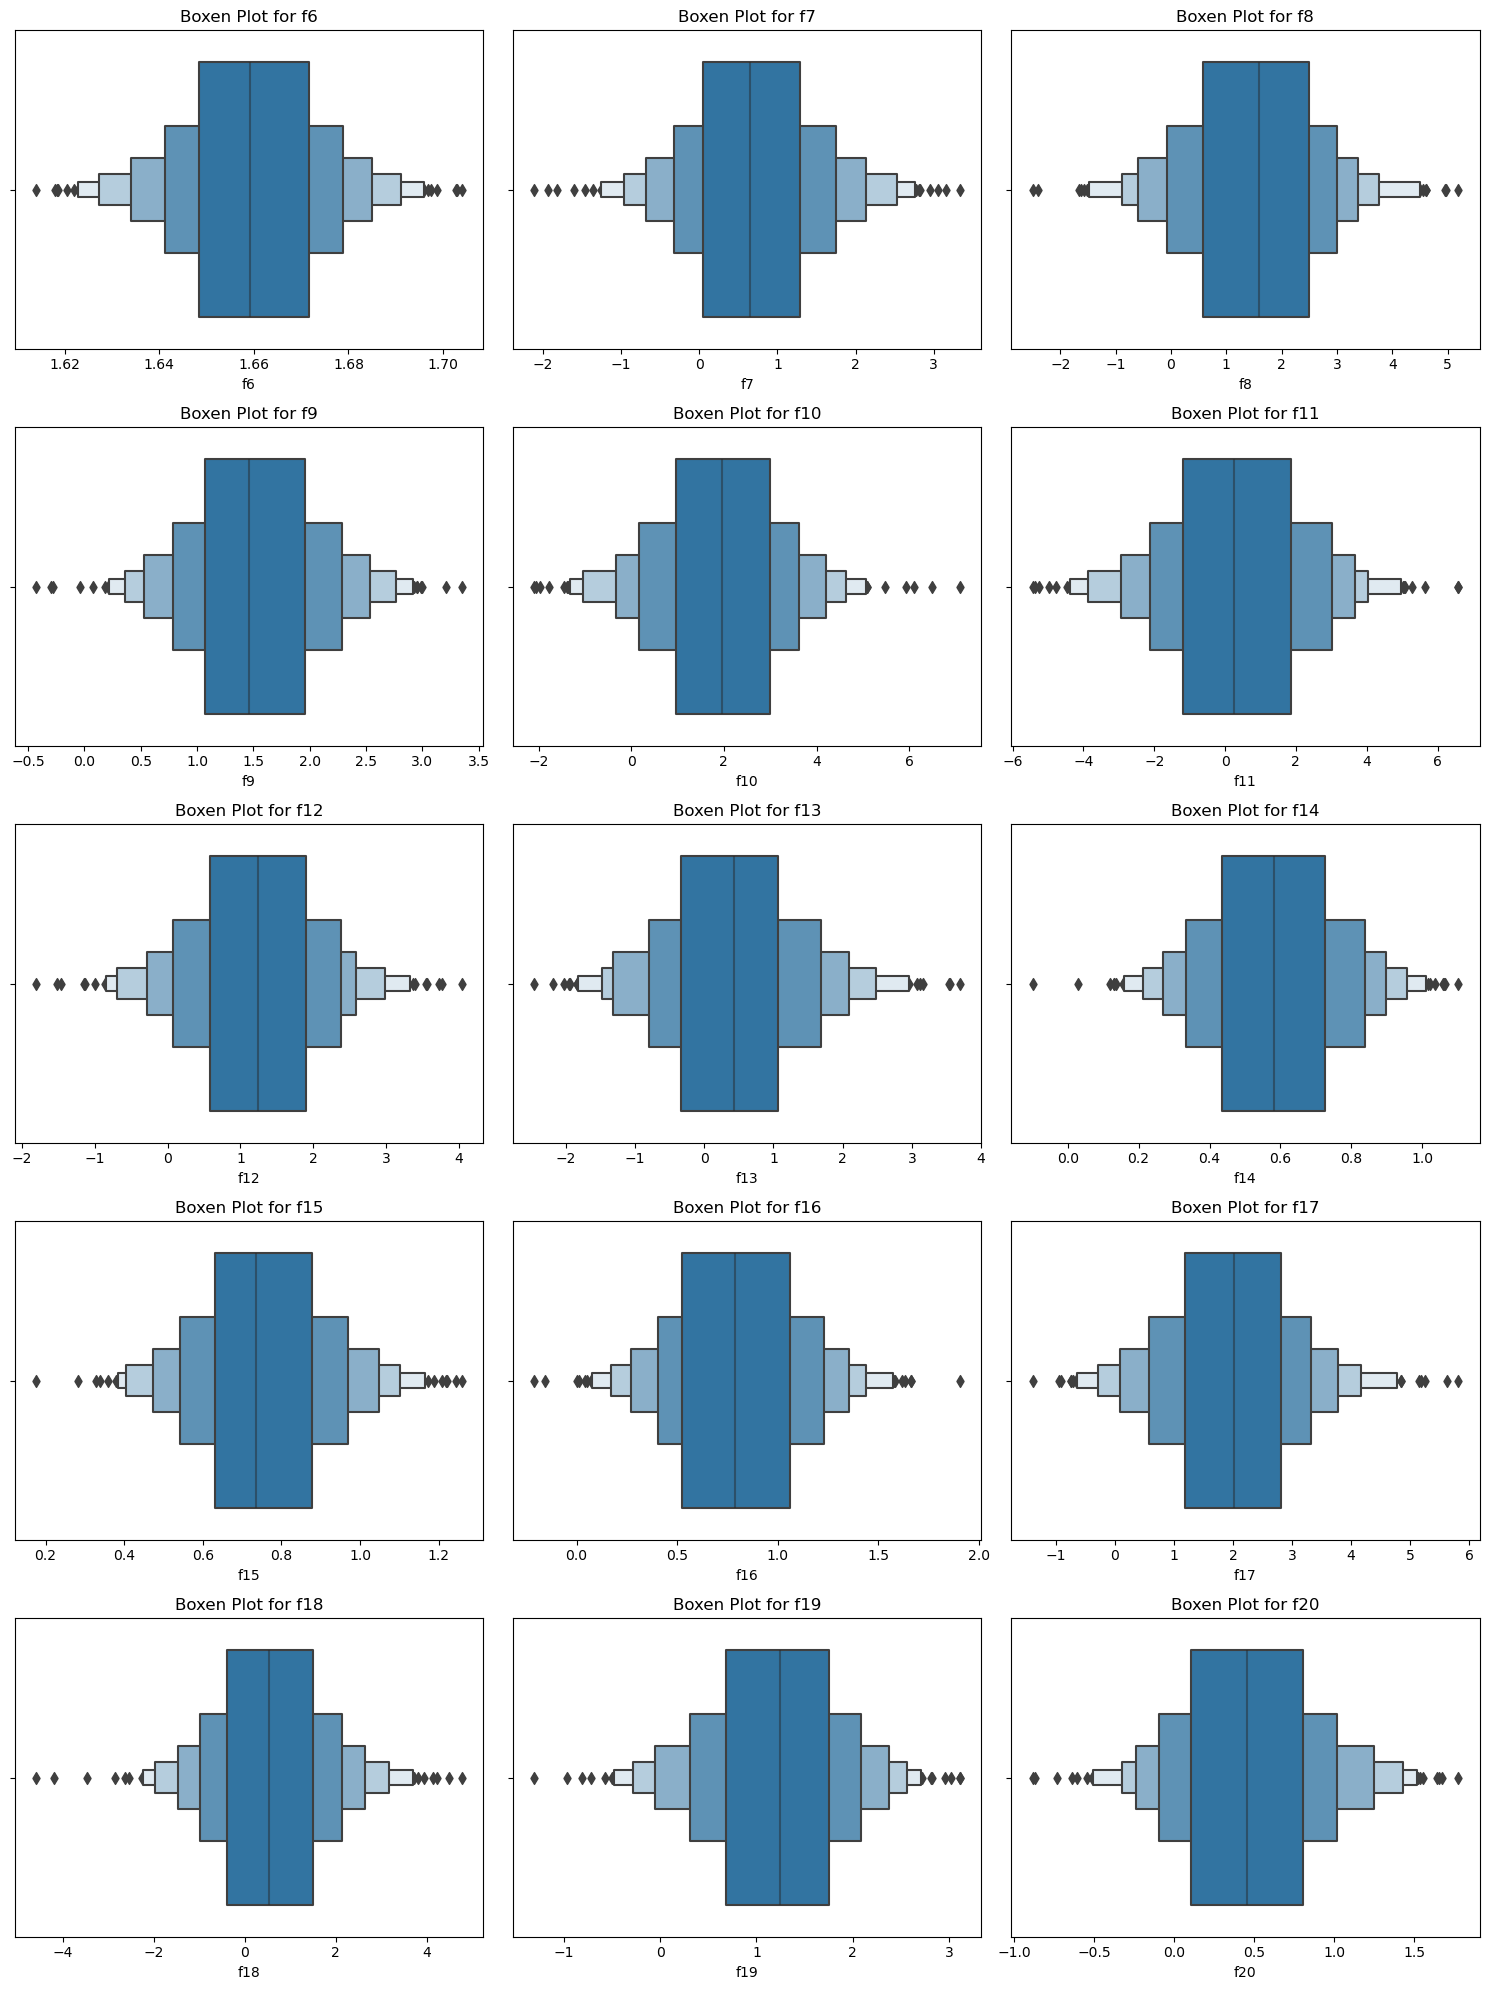

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Variables 'f6' to 'f20'
variables = ['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']

# Create boxen plots for each variable in the grid
for i, variable in enumerate(variables):
    sns.boxenplot(x=train[variable], ax=axes[i])
    axes[i].set_title(f'Boxen Plot for {variable}')
    axes[i].set_xlabel(variable)

# Adjust layout
plt.tight_layout()
plt.show()

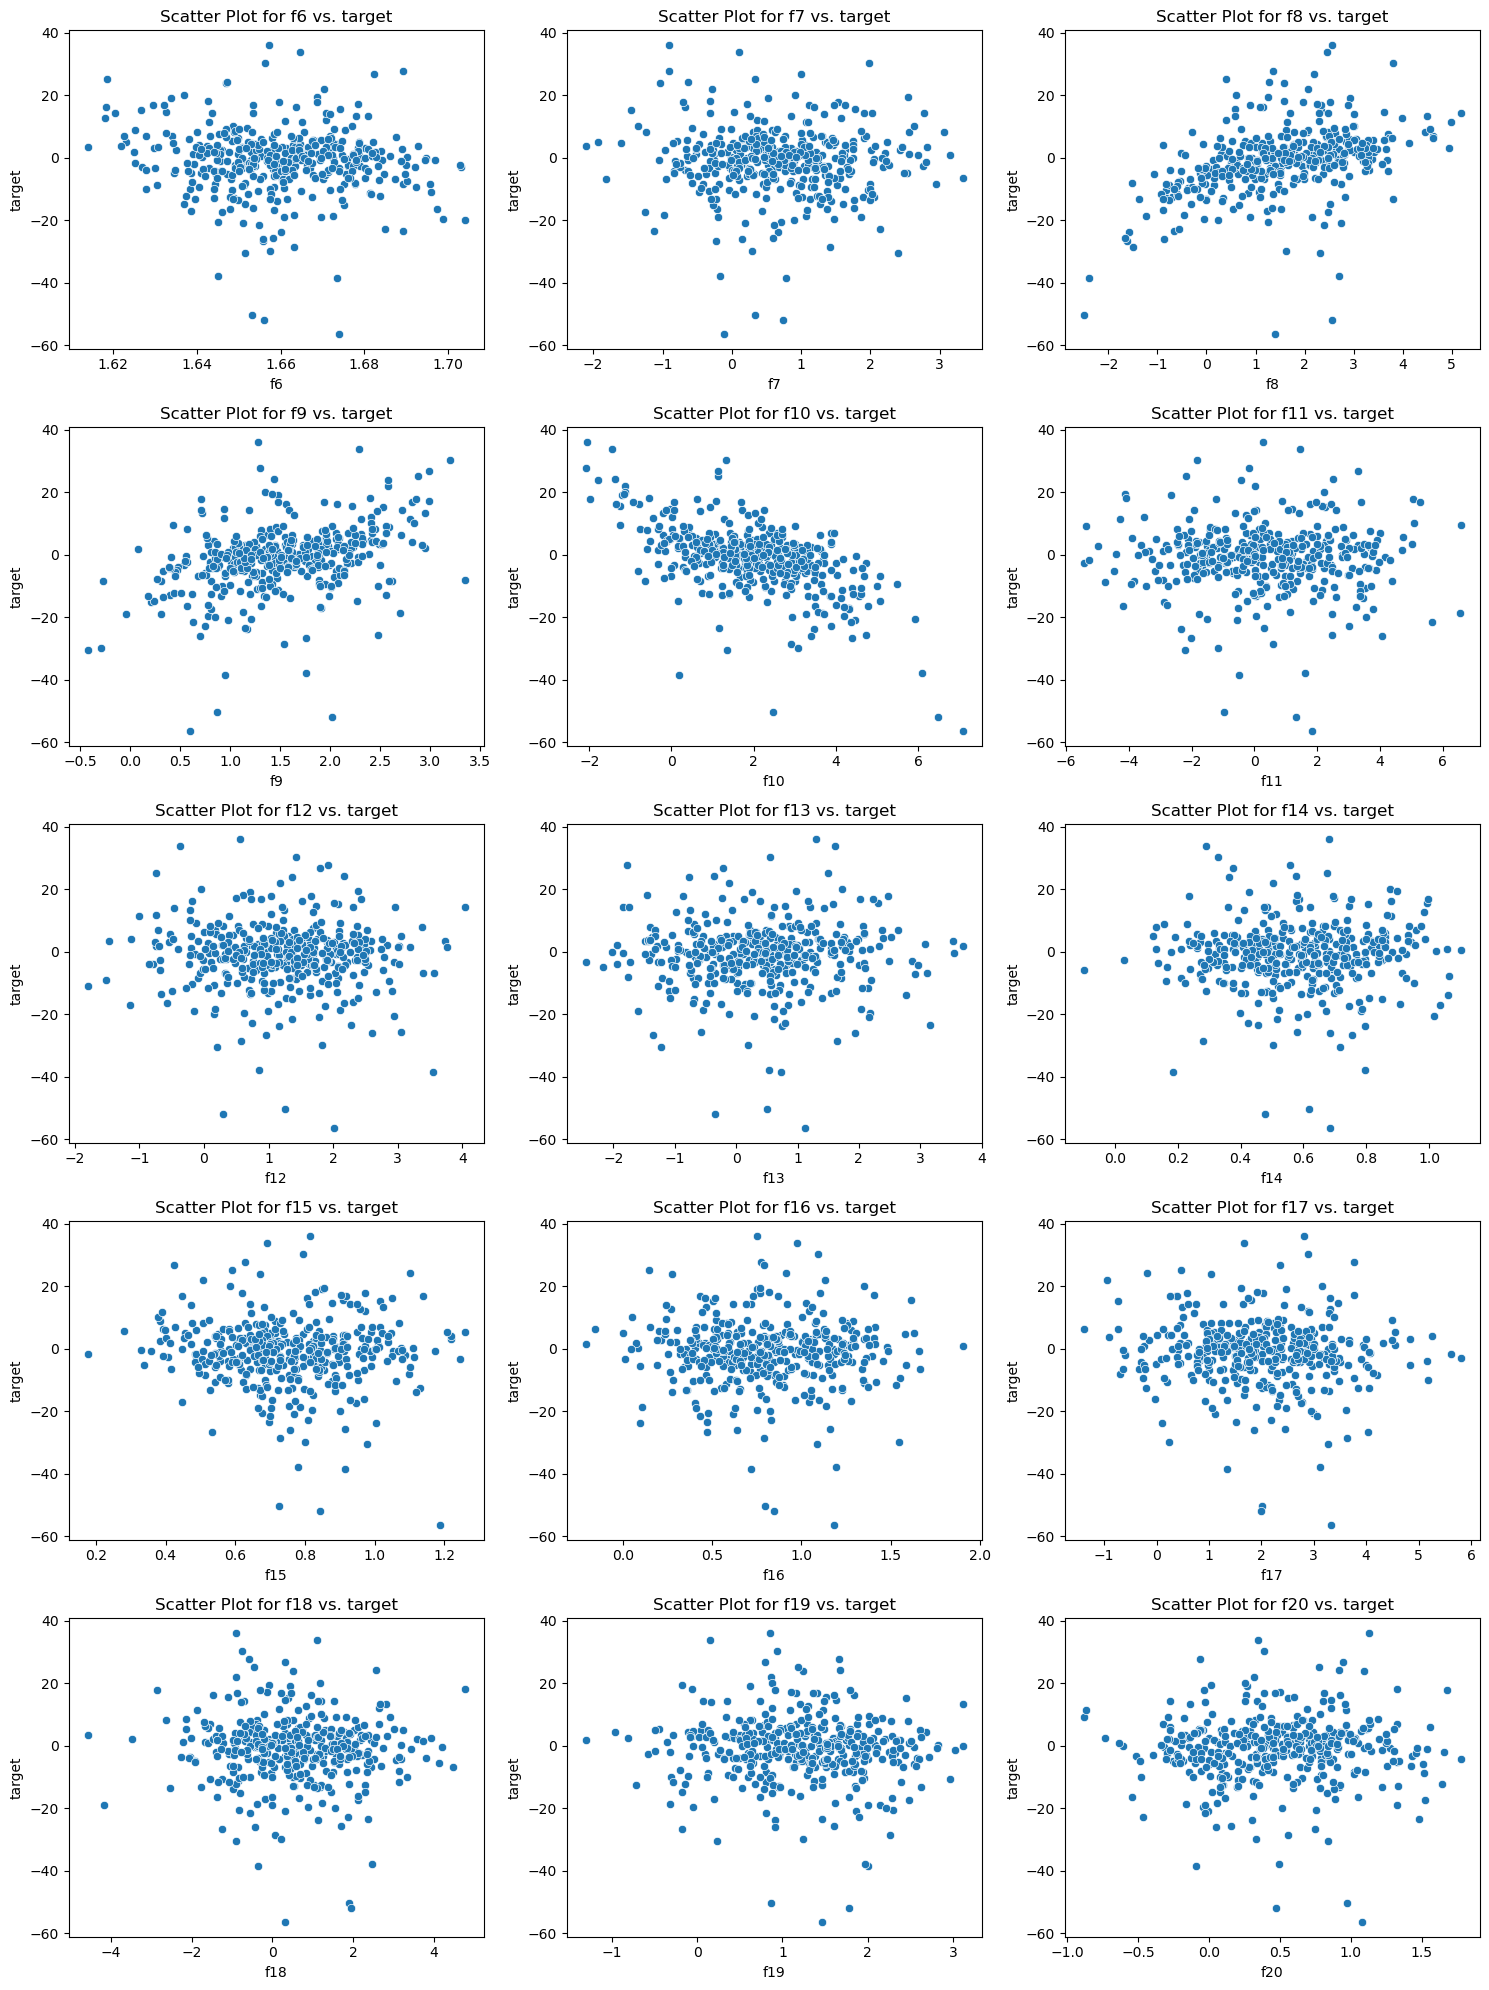

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a 5x3 grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Variables 'f6' to 'f20'
variables = ['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']

# Response variable
target_variable = 'target'

# Create scatter plots for each variable against 'target' in the grid
for i, variable in enumerate(variables):
    sns.scatterplot(x=train[variable], y=train[target_variable], ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {variable} vs. {target_variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel(target_variable)

# Adjust layout
plt.tight_layout()
plt.show()

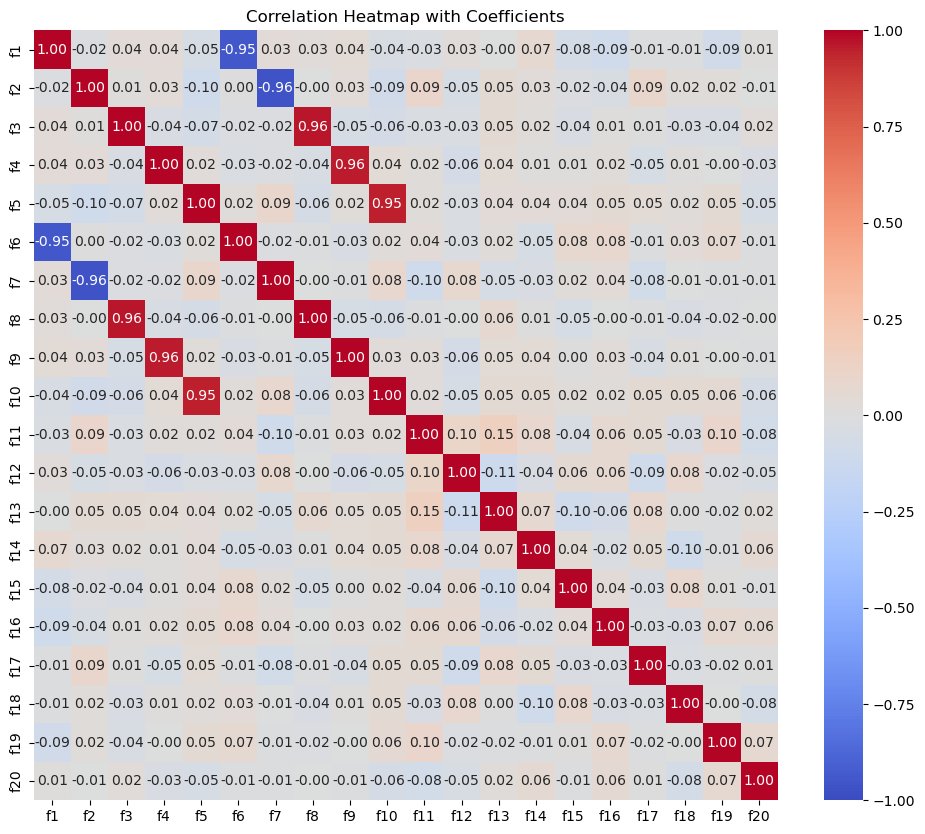

In [21]:
# Variable correlations - correlation heat map with numbers
X = train[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10',
          'f11','f12','f13','f14','f15','f16','f17','f18','f19','f20']]
y = train[['target']].copy()

# Compute the correlation matrix
corr = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with correlation coefficients
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Coefficients')
plt.show()

In [31]:
##---- STANDARDIZATION ----------------------------------------------------
from sklearn.preprocessing import StandardScaler
# f1-f5 has almost a 1:1 correlation with f6-f10

# Drop f1:f5
X = train[['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 
           'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
##---- MODEL TRAINING --------------------------------------------
# Linear?
    # Linear regression
# Non-linear-ish?
    # KNN with high K, linear models with [non-linear variable transofmrations] <- (explore with GAM)
# Non-linear?
    # KNN with low K, RF, Boosted trees, Neural networks

# What are the dimensions of the dataset (n vs p) and how should that affect my approach?

# Are features redundant?
    # Some features may need to be removed (feature selection) or combined (PCA)
    # Remember linear correlations are different from whether one feature can be predicted by others

# How noisy is the data
    # Noisier datasets typically require simpler models

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

In [57]:
# Create a KNN model
knn1 = KNeighborsRegressor(n_neighbors=5, weights = 'distance')

# Define a custom scorer for cross_val_score
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Perform k-fold cross-validation and get scores
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn1, Xs, y, cv=kf, scoring=rmse_scorer)

# Negative scores are used because sklearn's convention is that higher scores are better,
# but we want to minimize RMSE, so lower is better
rmse_scores = -scores

# Print the cross-validated RMSE scores
print("Cross-validated RMSE scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

Cross-validated RMSE scores: [8.58333559 8.61763307 8.87271438 8.84045479 8.19393069]
Mean RMSE: 8.621613701454518


In [52]:
# Reduce Dimentionality with PCA
from sklearn.decomposition import PCA

# Initiate model
n_components = 5
pca = PCA(n_components = n_components)

# Fit the PCA model to the scaled features
Xs_pca = pca.fit_transform(Xs)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio: [0.09436079 0.08421651 0.07866055 0.07660462 0.07333265]
Cumulative Explained Variance: [0.09436079 0.1785773  0.25723785 0.33384247 0.40717512]


In [ ]:
##---- FEATURE EXTRACTION -----------------------------------------
# Plot correlation with our response variable

In [81]:
##---- MAKING PREDICTIONS WITH TEST DATA ------------------------------------------

# Define
X_test = test[['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 
           'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]

# Scale
scaler = StandardScaler()
Xs_test = scaler.fit_transform(X_test)

# Fit
knn1.fit(Xs, y)

# Predict
y_pred = knn1.predict(Xs_test)


In [85]:
# Make a Dataframe
knn1_preds = test[['id']].copy()

knn1_preds['target'] = y_pred

# Export
knn1_preds.to_csv('knn1_preds.csv', index=False)

In [88]:
X = train[['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 
           'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']].copy()

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

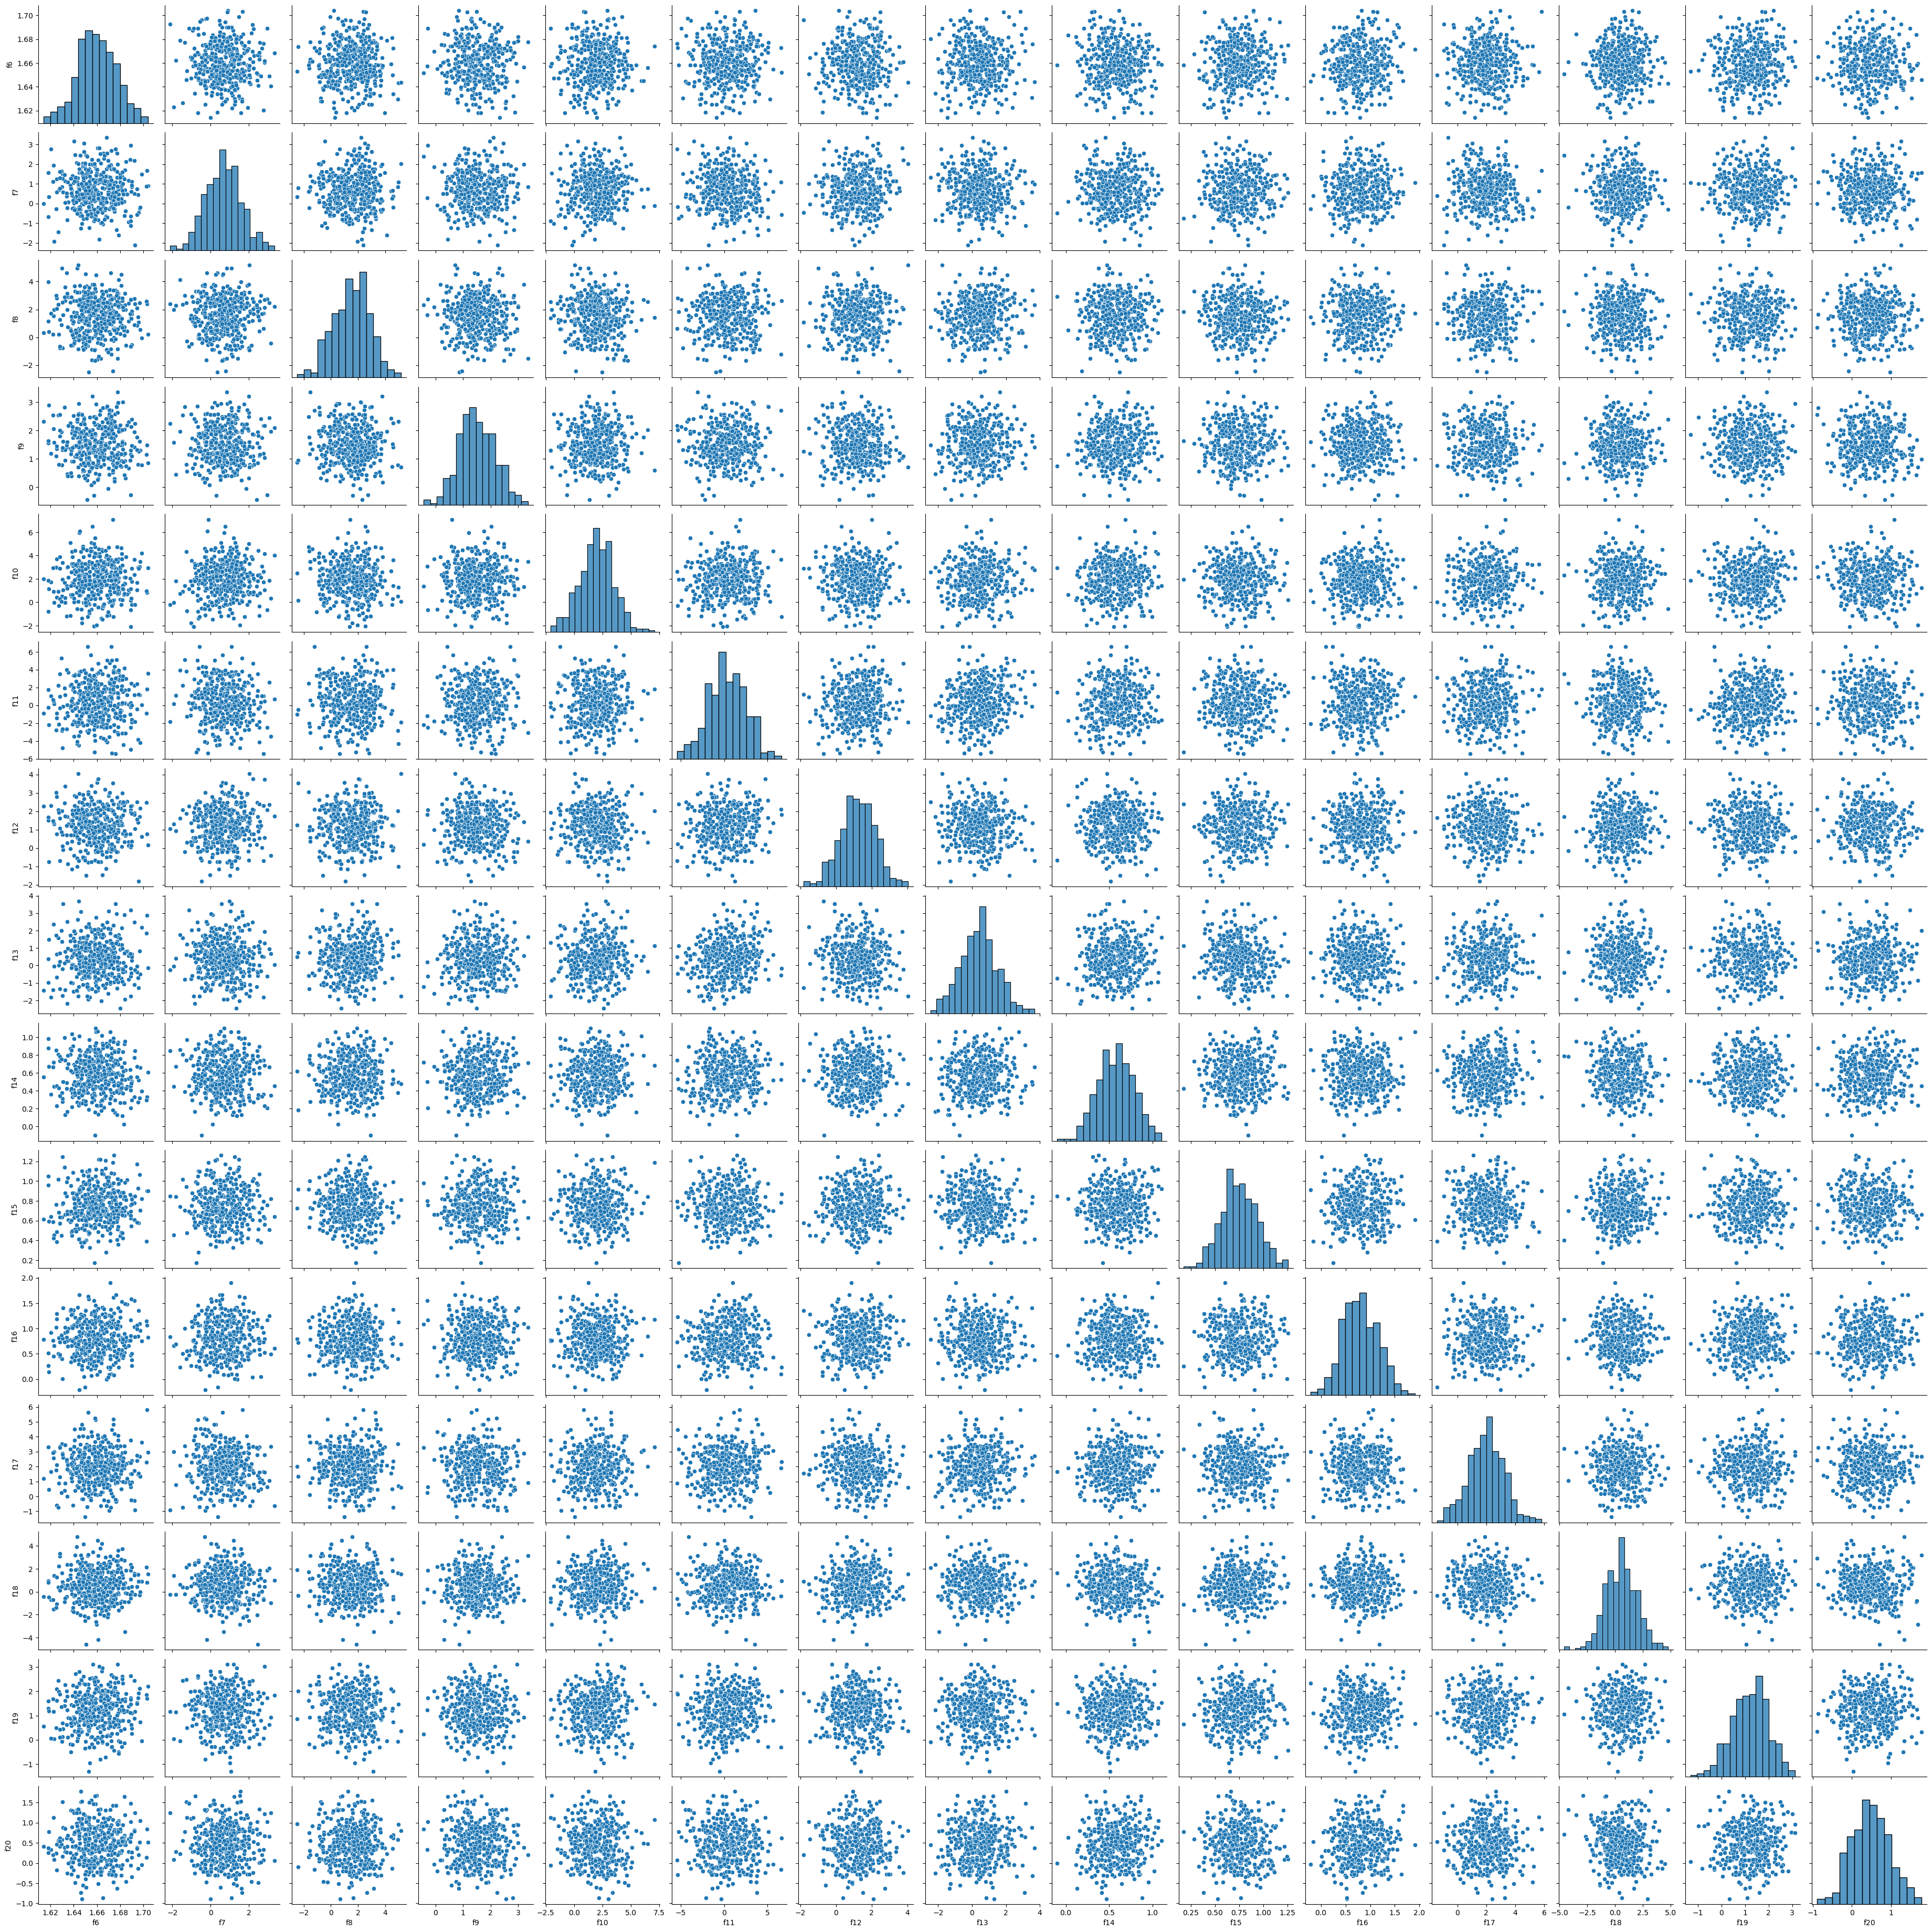

In [90]:
sns.pairplot(X)

In [93]:
!pip install umap-learn

                                              0.0/90.9 kB ? eta -:--:--
     -----------------                      41.0/90.9 kB 653.6 kB/s eta 0:00:01
     ------------------------------------     81.9/90.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 90.9/90.9 kB 867.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/55.8 kB ? eta -:--:--
     ------------------------------------     51.2/55.8 kB ? eta -:--:--
     ------------------------------------     51.2/55.8 kB ? eta -:--:--
     ------------------------------------     51.2/55.8 kB ? eta -:--:--
     ------------------------------------     51.2/55.8 kB ? eta -:--:--
     -------------------------------------- 55.8/55.8 kB 224.5 kB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86931 sha256=49389cbbcde27c49a66753329c51590dac69acc1cfb0d70c5

In [103]:
import umap

n_components = 3
umap_model = umap.UMAP(n_components=n_components)
X_umap = umap_model.fit_transform(Xs)


In [104]:
# Create a KNN model
knn2 = KNeighborsRegressor(n_neighbors=5)

# Define a custom scorer for cross_val_score
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Perform k-fold cross-validation and get scores
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn2, X_umap, y, cv=kf, scoring=rmse_scorer)

# Negative scores are used because sklearn's convention is that higher scores are better,
# but we want to minimize RMSE, so lower is better
rmse_scores = -scores

# Print the cross-validated RMSE scores
print("Cross-validated RMSE scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

Cross-validated RMSE scores: [10.4516123   8.53158096  9.34614658 10.63161084  9.71767868]
Mean RMSE: 9.735725873806498


In [135]:
# Define
X_test = test[['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 
           'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']].copy()

# Scale
scaler = StandardScaler()
Xs_test = scaler.fit_transform(X_test)

# Fit
knn2.fit(X_umap, y)

# Predict
Xs_test_umap = umap_model.fit_transform(Xs)
y_pred = knn2.predict(Xs_test_umap)

# Make a Dataframe
knn2_preds = test[['id']].copy()
knn2_preds['target'] = y_pred

# Export
knn2_preds.to_csv('knn2_preds.csv', index=False)

ValueError: Length of values (400) does not match length of index (800)

In [132]:
from sklearn.ensemble import RandomForestRegressor as rfr

# Initialize the Random Forest
rf2 = rfr(n_estimators=90, 
          random_state=42,
         max_features = 0.8)

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf1, Xs, y, cv=kf, scoring=rmse_scorer)

# Negative scores are used because sklearn's convention is that higher scores are better,
# but we want to minimize RMSE, so lower is better
rmse_scores = -scores

# Print the cross-validated RMSE scores
print("Cross-validated RMSE scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selec

Cross-validated RMSE scores: [5.36155985 4.85178436 6.92634793 5.41627322 4.91400091]
Mean RMSE: 5.493993253700557


In [108]:
# Fit
rf1.fit(Xs, y)

# Predict
y_pred_rf1 = rf1.predict(Xs_test)

# Make a Dataframe
rf1_preds = test[['id']].copy()
rf1_preds['target'] = y_pred_rf1

# Export
rf1_preds.to_csv('rf1_preds.csv', index=False)

C:\Users\by197116\AppData\Local\Temp\ipykernel_15024\1089954414.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(Xs, y)


In [133]:
# Fit
rf2.fit(Xs, y)

# Predict
y_pred_rf2 = rf2.predict(Xs_test)

# Make a Dataframe
rf2_preds = test[['id']].copy()
rf2_preds['target'] = y_pred_rf2

# Export
rf2_preds.to_csv('rf2_preds.csv', index=False)

C:\Users\by197116\AppData\Local\Temp\ipykernel_15024\863901935.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(Xs, y)


In [140]:
!pip install pygam

                                              0.0/522.2 kB ? eta -:--:--
     ----                                    61.4/522.2 kB 1.1 MB/s eta 0:00:01
     -----------                            153.6/522.2 kB 1.5 MB/s eta 0:00:01
     --------------------------             368.6/522.2 kB 2.6 MB/s eta 0:00:01
     -------------------------------------  512.0/522.2 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 522.2/522.2 kB 2.5 MB/s eta 0:00:00


<Axes: xlabel='target'>

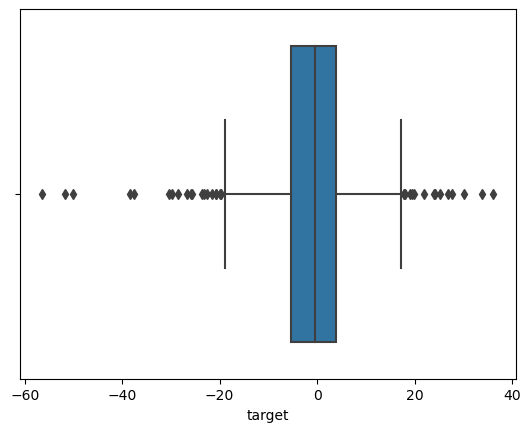

In [143]:
# Create seaborn box plot for target variable
sns.boxplot(x=train.target)

In [146]:
# Create numpy array for target variable
target = np.array(train.target)

# Calculate Z-scores for target variable
z_scores = (target - np.mean(target)) / np.std(target)

# Set threshold for Z-score values
threshold = 1.96

# Find indices of outliers based on Z-score values
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Iterate through each outlier index
for outlier_index in outlier_indices:
    # Find the five closest values within the threshold
    closest_values_indices = np.argsort(np.abs(target - target[outlier_index]))[:5]
    
    # Exclude the outlier itself
    closest_values_indices = closest_values_indices[closest_values_indices != outlier_index]
    
    # Calculate the mean of the five closest values
    replacement_value = np.mean(target[closest_values_indices])
    
    # Replace the outlier with the calculated mean
    target[outlier_index] = replacement_value

<Axes: >

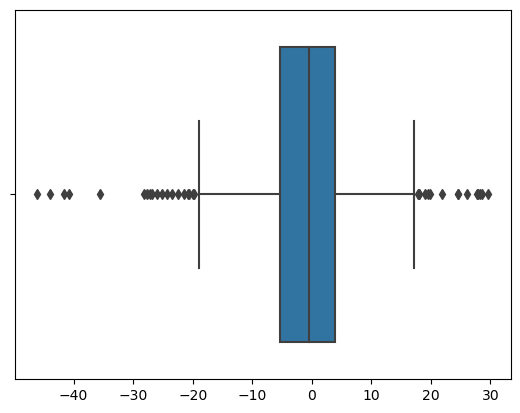

In [147]:
sns.boxplot(x=target)

In [148]:
train_red = train.copy()

train_red['target'] = target

train_red.head()

id        f1        f2        f3        f4        f5        f6        f7  \
0   1  0.777029 -0.268638  0.006591  2.941390  1.738013  1.672624  1.073224   
1   2  1.203906  0.536988  0.476183  0.982111  1.737830  1.640134  0.302358   
2   3  0.751503 -0.036427  0.404269  0.143162  1.737872  1.680058  1.071646   
3   4  0.669598  0.685746  0.328121  1.353119  1.737922  1.683888 -0.632106   
4   5  0.731188 -0.272476  0.375570  2.343038  1.737871  1.668550  1.747394   

         f8        f9  ...       f12       f13       f14       f15       f16  \
0 -1.225081  2.700900  ...  2.098585 -0.547649  0.523154  0.786378  0.104577   
1  1.782921  1.442371  ...  0.997498  0.856467  0.696694  0.628658  1.075109   
2  1.263593  1.153890  ...  1.511541  1.185047  0.269776  0.701282  1.041008   
3  0.140971  1.549584  ...  2.043596  0.706472  0.925189  0.656511  0.524939   
4  0.788427  2.094505  ...  0.446173 -1.051054  0.931456  0.949737  0.641303   

        f17       f18       f19       f20     target  
0  1.903580 -0.377440 -0.315180 -0.164134 -18.759727  
1  2.234290 -0.388820  0.644219  0.724307   8.082223  
2  1.847635  1.163074  1.259852  0.548363   2.961315  
3  1.878676  2.755045  1.664802  0.453177  -0.710178  
4  1.958897 -2.146309  1.793418  1.107921   5.328069  

[5 rows x 22 columns]

In [149]:
# Define
X = train[['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 
           'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']].copy()

y = target

# Scale
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [150]:
# Initialize the Random Forest
rf3 = rfr(n_estimators=90, 
          random_state=42)

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf3, Xs, y, cv=kf, scoring=rmse_scorer)

# Negative scores are used because sklearn's convention is that higher scores are better,
# but we want to minimize RMSE, so lower is better
rmse_scores = -scores

# Print the cross-validated RMSE scores
print("Cross-validated RMSE scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

Cross-validated RMSE scores: [4.73616889 5.07416282 6.57651363 4.54707809 4.76945073]
Mean RMSE: 5.140674829277015


In [151]:
# Fit
rf3.fit(Xs, y)

# Predict
y_pred_rf3 = rf3.predict(Xs_test)

# Make a Dataframe
rf3_preds = test[['id']].copy()
rf3_preds['target'] = y_pred_rf3

# Export
rf3_preds.to_csv('rf3_preds.csv', index=False)

In [ ]:
# Define
X_test = test[['f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 
           'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']].copy()

# Scale
scaler = StandardScaler()
Xs_test = scaler.fit_transform(X_test)

In [153]:
y_temp = train[['target']].copy()

ys = scaler.fit_transform(y_temp)

In [154]:
# Initialize the Random Forest
rf4 = rfr(n_estimators=90, 
          random_state=42)

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf4, Xs, ys, cv=kf, scoring=rmse_scorer)

# Negative scores are used because sklearn's convention is that higher scores are better,
# but we want to minimize RMSE, so lower is better
rmse_scores = -scores

# Print the cross-validated RMSE scores
print("Cross-validated RMSE scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\by197116\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selec

Cross-validated RMSE scores: [0.48642012 0.44829767 0.64409441 0.4774655  0.4515732 ]
Mean RMSE: 0.5015701789181295


In [155]:
# Fit
rf4.fit(Xs, ys)

# Predict
y_pred_rf4 = rf4.predict(Xs_test)

# Make a Dataframe
rf4_preds = test[['id']].copy()
rf4_preds['target'] = y_pred_rf4

# Export
rf4_preds.to_csv('rf4_preds.csv', index=False)

C:\Users\by197116\AppData\Local\Temp\ipykernel_15024\1785462896.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf4.fit(Xs, ys)


In [166]:
X1 = train[['f1','f2','f3','f4','f5']].copy()

scaler = StandardScaler()
X1s = scaler.fit_transform(X1)

# Initialize the Random Forest
rf5 = rfr(n_estimators=200, 
          random_state=42)

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf5, X1s, y, cv=kf, scoring=rmse_scorer)

# Negative scores are used because sklearn's convention is that higher scores are better,
# but we want to minimize RMSE, so lower is better
rmse_scores = -scores

# Print the cross-validated RMSE scores
print("Cross-validated RMSE scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

Cross-validated RMSE scores: [3.32304807 3.40137258 4.93880834 3.54178228 3.15155595]
Mean RMSE: 3.671313443756861


In [173]:
X_test_sub1 = test[['f1','f2','f3','f4','f5']].copy()
Xs_test_sub1 = scaler.fit_transform(X_test_sub1)

# Fit
rf5.fit(X1s, y)

# Predict
y_pred_rf5 = rf5.predict(Xs_test_sub1)

# Make a Dataframe
rf5_preds = test[['id']].copy()
rf5_preds['target'] = y_pred_rf5

# Export
rf5_preds.to_csv('rf5_preds.csv', index=False)

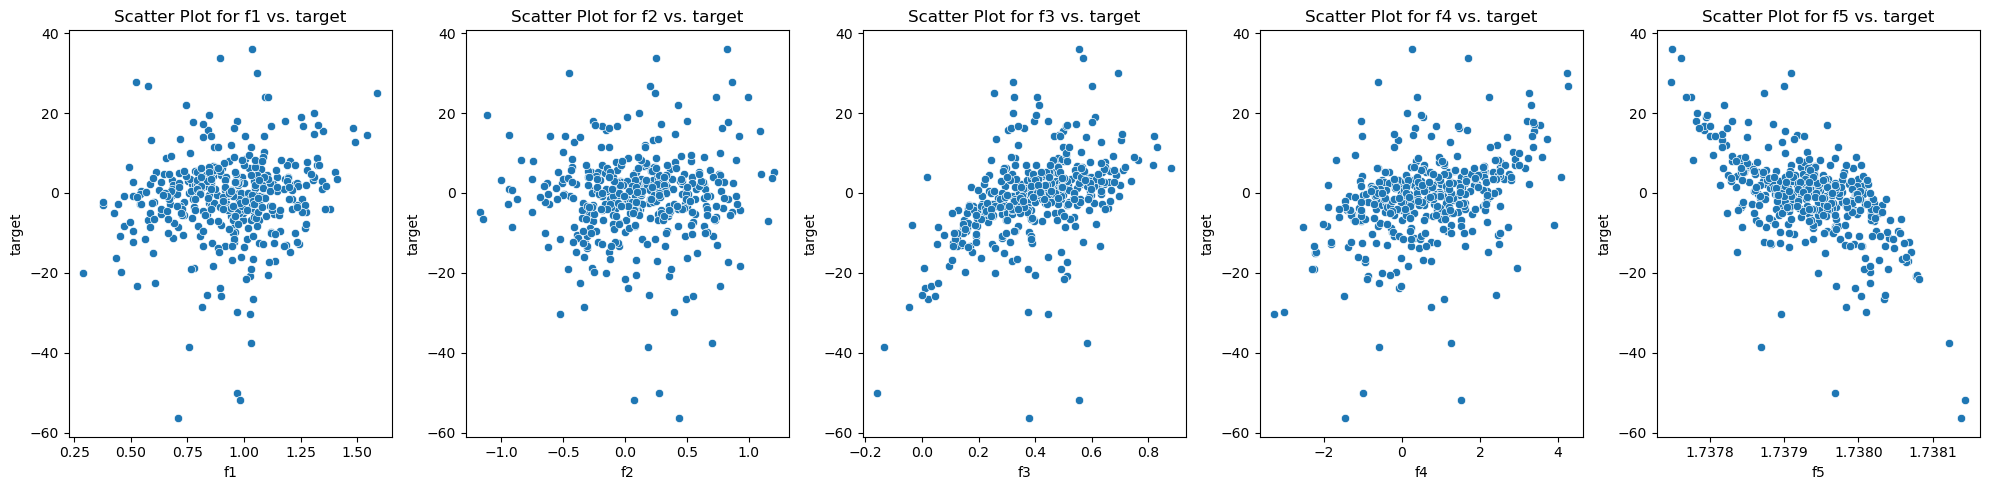

In [175]:
# Set up a 5x3 grid
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Variables 'f1' to 'f5'
variables = ['f1', 'f2', 'f3', 'f4', 'f5']

# Response variable
target_variable = 'target'

# Create scatter plots for each variable against 'target' in the grid
for i, variable in enumerate(variables):
    sns.scatterplot(x=train[variable], y=train[target_variable], ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {variable} vs. {target_variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel(target_variable)

# Adjust layout
plt.tight_layout()
plt.show()

In [177]:
X_test_sub2 = test[['f3','f4','f5']].copy()
Xs_test_sub2 = scaler.fit_transform(X_test_sub2)

X2 = train[['f3','f4','f5']].copy()

scaler = StandardScaler()
X2s = scaler.fit_transform(X2)

# Fit
rf5.fit(X2s, y)

# Predict
y_pred_rf6 = rf5.predict(Xs_test_sub2)

# Make a Dataframe
rf6_preds = test[['id']].copy()
rf6_preds['target'] = y_pred_rf6

# Export
rf6_preds.to_csv('rf6_preds.csv', index=False)

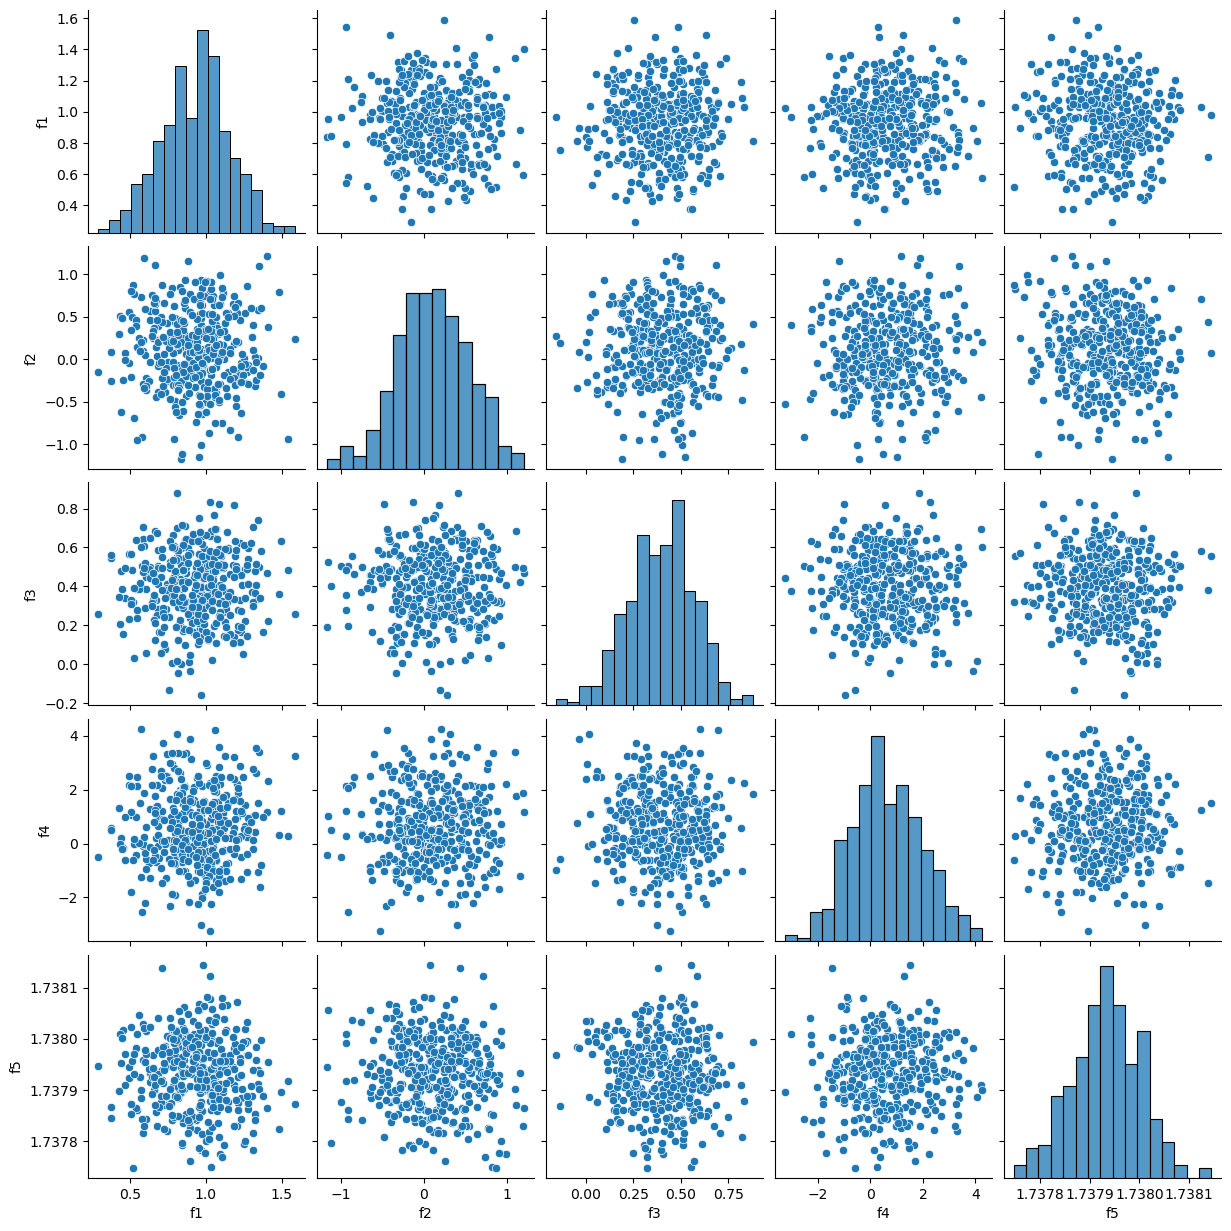

In [178]:
sns.pairplot(X1)